## ТПР 10. Дискриминантная функция
#### Козловский А.А., гр. 2253

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### Реализация необходимых функций

In [2]:
def make_data(avg, std, count, label):
    """Функция для генерации объектов одного класса
    requirements: numpy
    avg: мат.ожидание [tuple]
    std: стандартное отклонение [tuple]
    count: количество объектов [int]
    label: название класса [str]
    returns: ТОС [np.array]"""
    features = np.concatenate((np.array([np.random.normal(avg[0], std[0], count)]).T,
                               np.array([np.random.normal(avg[1], std[1], count)]).T),
                              axis=1)
    result = np.concatenate((features, 
                             np.array([[label for _ in features]], dtype=object).T), 
                            axis=1)    
    return result

In [3]:
def make_df(data, columns):
    """Функция для построение датафрейма по массиву
    requirements: panas, numpy
    data: массив с данными про объекты [numpy.array]
    columns: названия столбцов в датафрейме [list/numpy.array]
    returns: датафрейм [pandas.DataFrame]"""
    new_data = np.concatenate((data, np.array([['' for _ in data]]).T), axis=1)
    result = pd.DataFrame(columns=columns, data=new_data)
    return result

In [103]:
def cov(data):
    """Функция для построение матрицы ковариации
    requirements: numpy
    data_first: данный об объектах по двум свойствам [np.array]
    returns: матрицу ковариации [np.array]"""
    result = np.zeros((2, 2), dtype=float)
    
    means = np.array([data.T[0].mean(), data.T[1].mean()], dtype=float)
    for ix, iy in np.ndindex(result.shape):
        result[ix, iy] = (np.sum([(values[ix] - means[ix]) * (values[iy] - means[iy])
                                  for values in data.T[:2].T])) / first.T[:2].shape[1]
    return result

#### Генерация данных и создание датафрейма и визуализация

In [102]:
first_settings = {
    'avg': (10, 20),
    'std': (10, 15),
    'count': 50,
    'label': 0
}

second_settings = {
    'avg': (60, 80),
    'std': (7, 10),
    'count': 50,
    'label': 1
}

first = make_data((10, 20), (10, 15), 50, 0)
second = make_data((60, 80), (7, 10), 50, 1)
data = np.concatenate((first, second))

In [5]:
columns = ['first', 'second', 'actual', 'predicted']
df = make_df(data, columns)

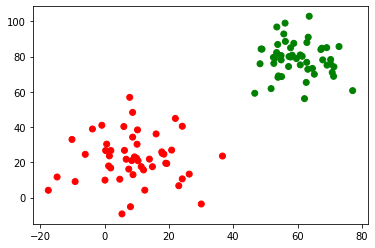

In [6]:
cmap_light = ListedColormap(['red', 'green'])
plt.scatter(data.T[0], data.T[1], c=data.T[2], cmap=cmap_light)
plt.show()

#### Нахождение дискриминантной функции

In [67]:
cov_matrix_1, cov_matrix_2 = cov(first), cov(second)

first_count, second_count = first.shape[0], second.shape[0]
res_cov_matrix = (first_count * cov_matrix_1 + 
                  second_count * cov_matrix_2) / (first_count + second_count)

In [73]:
inv_cov_mat = np.linalg.inv(res_cov_matrix)

In [85]:
first_ax, first_ay = first.T[0].mean(), first.T[1].mean()
second_ax, second_ay = second.T[0].mean(), second.T[1].mean()
first_means = np.array([first_ax, first_ay])
second_means = np.array([second_ax, second_ay])

first_plus_second = first_means + second_means
first_minus_second = first_means - second_means


In [93]:
b = np.dot(first_minus_second, inv_cov_mat)
p = -0.5 * np.dot(first_plus_second, b)

In [99]:
d = lambda x: (b[0] * x + p) / -b[1]

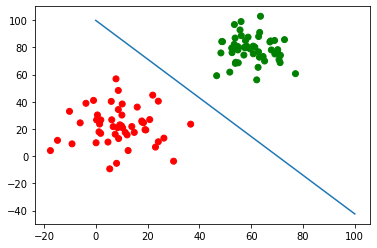

In [101]:
x = np.linspace(0, 100, 100)
plt.scatter(data.T[0], data.T[1], c=data.T[2], cmap=cmap_light)
plt.plot(x, d(x))
plt.show()

#### Подсчет ошибок

In [114]:
errors = 0
for value in data:
    if d(value[0]) <= value[1] and value[2] == 0:
        errors += 1
    elif d(value[0]) > value[1] and value[2] == 1:
        errors += 1

p_error = errors / data.shape[0]
print(p_error)

0.0
